In [1]:
# import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

In [2]:
 # Define paths to your dataset
base_path = '/Users/msalah/Downloads/triple_mnist/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'val')

**Import the data from the excel file**

In [3]:
import os
from PIL import Image

def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_folders = sorted(os.listdir(folder_path))  # Assumes class folders are named by numbers or labels
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                if img_path.endswith('.jpg') or img_path.endswith('.png'):  # Adjust based on your image formats
                    try:
                        img = Image.open(img_path)
                        img = np.array(img)  # Convert PIL Image to numpy array
                        images.append(img)
                        #labels.append(int(class_folder))  # Assuming class folders are named numerically
                        labels.append([int(digit) for digit in class_folder])  # Convert class_folder name to list of digits

                    except Exception as e:
                        print(f"Error loading image: {img_path}. {e}")
    return images, labels


In [4]:


def load_and_prepare_data():
    global x_train, y_train, x_test, y_test, x_val, y_val
    
   

    # Load images and labels for train, test, and val sets
    x_train, y_train = load_images_from_folder(train_path)
    x_test, y_test = load_images_from_folder(test_path)
    x_val, y_val = load_images_from_folder(val_path)

    # Convert lists to numpy arrays for easier manipulation
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_val = np.array(x_val)

    x_train = np.array(x_train).astype('float32') / 255.0
    x_test = np.array(x_test).astype('float32') / 255.0
    x_val = np.array(x_val).astype('float32') / 255.0

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    y_val = np.array(y_val)

    # Print out the shapes to verify
    print(f"Train images shape: {x_train.shape}, Train labels shape: {y_train.shape}")
    print(f"Test images shape: {x_test.shape}, Test labels shape: {y_test.shape}")
    print(f"Val images shape: {x_val.shape}, Val labels shape: {y_val.shape}")


load_and_prepare_data()


Train images shape: (64000, 84, 84), Train labels shape: (64000, 3)
Test images shape: (20000, 84, 84), Test labels shape: (20000, 3)
Val images shape: (16000, 84, 84), Val labels shape: (16000, 3)


/Users/msalah/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


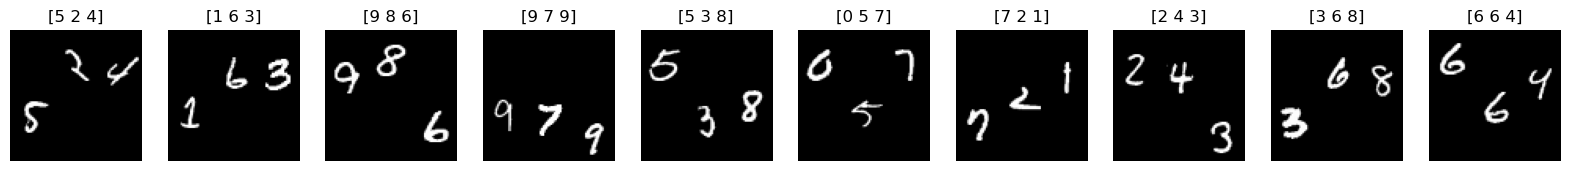

In [5]:

# print a couple of images from x_train data

from random import Random
rand = Random()
plt.figure(figsize=(20, 2))
for i in range(0, 10):
    plt.subplot(1,10, i + 1)
    x = rand.randint(0, len(x_train) - 1)  # select a random index from x_train data
    plt.imshow(x_train[x],cmap='gray')
    plt.title(y_train[x])
    plt.axis('off')
plt.show()

In [6]:
# Discover y_train
distinct_labels = np.unique(y_train)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
 #Discover y_test
distinct_labels = np.unique(y_test)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
#discover y_val
distinct_labels = np.unique(y_val)
print(distinct_labels)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
def thresholding(X_data, threshold):
    X_new = []

    for img in X_data:
        binary_img = img > threshold
        X_new.append(binary_img)

    return np.array(X_new)

threshold = 0.85
x_test = thresholding(x_test,threshold)
x_train = thresholding(x_train,threshold)
x_val = thresholding(x_val,threshold)


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
inputs = Input(shape=(84, 84, 1))

# Convolutional layers with Dropout
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)  # Adding Dropout layer

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)  # Adding Dropout layer

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)  # Adding Dropout layer


x = Flatten()(x)


# Output layers for each digit
digit1 = Dense(10, activation='softmax', name='digit1')(x)
digit2 = Dense(10, activation='softmax', name='digit2')(x)
digit3 = Dense(10, activation='softmax', name='digit3')(x)

# Create the model
model = Model(inputs=inputs, outputs=[digit1, digit2, digit3])

# Compile the model
model.compile(optimizer='adam',
              loss={'digit1': 'sparse_categorical_crossentropy', 'digit2': 'sparse_categorical_crossentropy', 'digit3': 'sparse_categorical_crossentropy'},
              metrics=['accuracy', 'accuracy', 'accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 84, 84, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 82, 82,    │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 41, 41,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 41, 41,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 39, 39,    │     36,928 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 19, 19,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 19, 19,    │          0 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 17, 17,    │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 8, 8, 64)  │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4096)      │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit1 (Dense)      │ (None, 10)        │     40,970 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit2 (Dense)      │ (None, 10)        │     40,970 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digit3 (Dense)      │ (None, 10)        │     40,970 │ flatten[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 197,406 (771.12 KB)

 Trainable params: 197,406 (771.12 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(x_train, 
                    {'digit1': y_train[:, 0], 'digit2': y_train[:, 1], 'digit3': y_train[:, 2]},
                    validation_data=(x_val, {'digit1': y_val[:, 0], 'digit2': y_val[:, 1], 'digit3': y_val[:, 2]}),
                    epochs=15,
                    batch_size=64)


Epoch 1/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 171s 170ms/step - digit1_accuracy: 0.5864 - digit2_accuracy: 0.5915 - digit3_accuracy: 0.5353 - loss: 3.5525 - val_digit1_accuracy: 0.9515 - val_digit2_accuracy: 0.9566 - val_digit3_accuracy: 0.9335 - val_loss: 0.5281
Epoch 2/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 169s 169ms/step - digit1_accuracy: 0.9455 - digit2_accuracy: 0.9455 - digit3_accuracy: 0.9219 - loss: 0.5970 - val_digit1_accuracy: 0.9638 - val_digit2_accuracy: 0.9694 - val_digit3_accuracy: 0.9497 - val_loss: 0.3746
Epoch 3/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1102s 1s/step - digit1_accuracy: 0.9626 - digit2_accuracy: 0.9627 - digit3_accuracy: 0.9470 - loss: 0.4028 - val_digit1_accuracy: 0.9716 - val_digit2_accuracy: 0.9761 - val_digit3_accuracy: 0.9626 - val_loss: 0.2905
Epoch 4/15
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 707s 708ms/step - digit1_accuracy: 0.9692 - digit2_accuracy: 0.9710 - digit3_accuracy: 0.9550 - loss: 0.3210 - val_digit1_accuracy: 0.9751 - val_digit2_accuracy: 0.9787 - val_digit

In [12]:
# evaluate the training
loss, accuracy1, accuracy2, accuracy3 = model.evaluate(x_test, 
                                                      {'digit1': y_test[:, 0], 'digit2': y_test[:, 1], 'digit3': y_test[:, 2]})

print(f"Test loss: {loss}")
print(f"Test accuracy for digit 1: {accuracy1}")
print(f"Test accuracy for digit 2: {accuracy2}")
print(f"Test accuracy for digit 3: {accuracy3}")



625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - digit1_accuracy: 0.9880 - digit2_accuracy: 0.9859 - digit3_accuracy: 0.9803 - loss: 0.1535
Test loss: 0.17436546087265015
Test accuracy for digit 1: 0.9839000105857849
Test accuracy for digit 2: 0.9832500219345093
Test accuracy for digit 3: 0.9800999760627747


In [13]:
# evaluate the valdating
loss, accuracy1, accuracy2, accuracy3 = model.evaluate(x_val, 
                                                      {'digit1': y_val[:, 0], 'digit2': y_val[:, 1], 'digit3': y_val[:, 2]})

print(f"Test loss: {loss}")
print(f"Test accuracy for digit 1: {accuracy1}")
print(f"Test accuracy for digit 2: {accuracy2}")
print(f"Test accuracy for digit 3: {accuracy3}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - digit1_accuracy: 0.9864 - digit2_accuracy: 0.9831 - digit3_accuracy: 0.9792 - loss: 0.1684
Test loss: 0.18236345052719116
Test accuracy for digit 1: 0.9838749766349792
Test accuracy for digit 2: 0.9828749895095825
Test accuracy for digit 3: 0.9790624976158142


In [14]:
y_pred = model.predict(x_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step


In [15]:
thresholded_predictions = [(pred > 0.9).astype(int) for pred in y_pred]

#Convert the binary vectors to digit classes
digit1_classes = np.argmax(thresholded_predictions[0], axis=1)
digit2_classes = np.argmax(thresholded_predictions[1], axis=1)
digit3_classes = np.argmax(thresholded_predictions[2], axis=1)
combined_numbers = [f"{d1}{d2}{d3}" for d1, d2, d3 in zip(digit1_classes, digit2_classes, digit3_classes)]

# Now `combined_numbers` contains the predicted numbers as strings
print(combined_numbers)

['002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '000', '002', '002', '003', '003', '003', '003', '003', '003', '000', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '000', '003', '003', '003', '003', '003', '003', '003', '000', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003', '003'

test = [6 8 0]  ===> predicted = 680
test = [5 1 3]  ===> predicted = 513
test = [5 0 4]  ===> predicted = 504
test = [3 1 5]  ===> predicted = 315
test = [0 6 5]  ===> predicted = 065
test = [3 8 2]  ===> predicted = 382
test = [3 2 2]  ===> predicted = 322
test = [5 9 5]  ===> predicted = 595
test = [3 4 0]  ===> predicted = 340
test = [3 8 5]  ===> predicted = 385


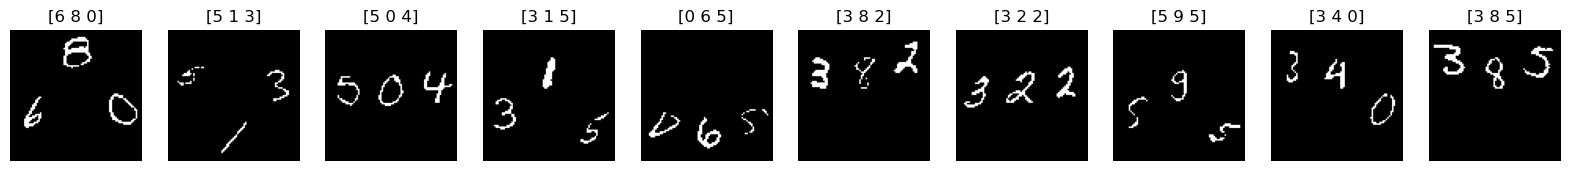

In [16]:
import random

# Set the random seed for reproducibility
random.seed(42)

# Pick 20 random indices
# Print the corresponding y_test and x_test values

from random import Random
rand = Random()
plt.figure(figsize=(20, 2))
for i in range(0, 10):
    plt.subplot(1,10, i + 1)
    x = rand.randint(0, len(x_test) - 1)  # select a random index from x_train data
    print(f'test = {y_test[x]}  ===> predicted = {combined_numbers[x]}')
    plt.imshow(x_test[x],cmap='gray')
    plt.title(y_test[x])
    plt.axis('off')
    #print y_pred
   
    
plt.show()



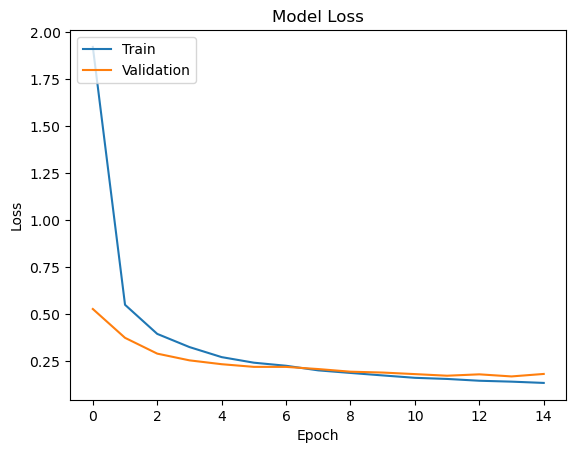

In [17]:
# sketch graph between train and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

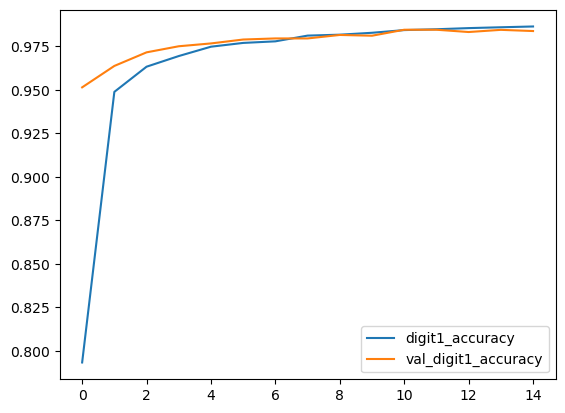

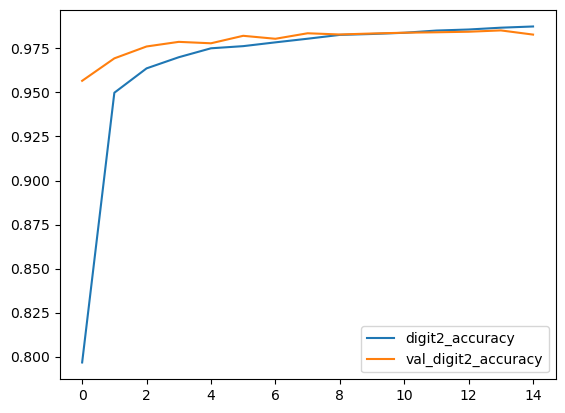

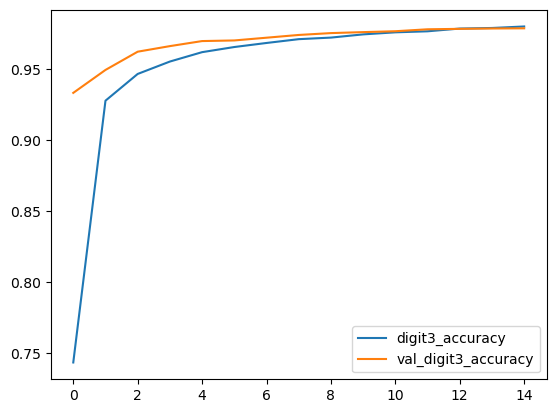

In [18]:
train_perf = pd.DataFrame(history.history)
#get the column names
train_perf.columns

train_perf[['digit1_accuracy', 'val_digit1_accuracy']].plot()
train_perf[['digit2_accuracy', 'val_digit2_accuracy']].plot()
train_perf[['digit3_accuracy', 'val_digit3_accuracy']].plot()

plt.show()

[[6286    0    0    0    0    5    7    0    1    1]
 [ 100 5693    3    1    0    0    0    3    0    0]
 [ 261    4 4617    1    0    1    2   11    3    0]
 [ 215    0    7 5557    0   13    0    3    4    1]
 [ 281    7    1    0 6279    0    3    6    0   23]
 [ 289    1    1    8    0 6387    8    2    4    0]
 [ 205    2    0    0    4    3 6284    0    2    0]
 [ 158    4    8    2    0    0    0 4822    0    6]
 [ 324    2    5    7    0   19    8    2 6326    7]
 [ 285    2    0    1   15    4    0   23    1 5369]]


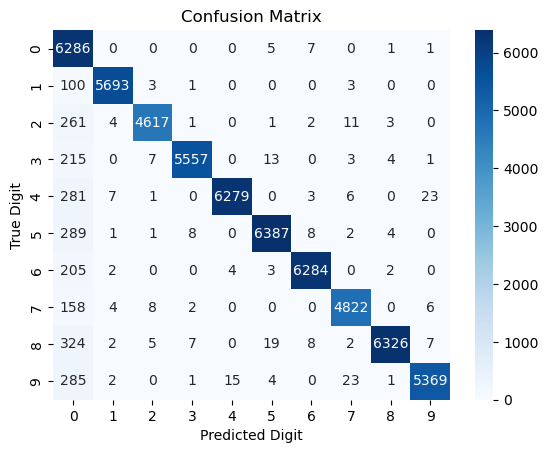

In [19]:
#create confusion maxtrix
from sklearn.metrics import confusion_matrix

# Convert the true labels to 1D arrays
y_true = np.concatenate([y_test[:, 0], y_test[:, 1], y_test[:, 2]])

# Convert the predicted labels to 1D arrays
y_pred = np.concatenate([digit1_classes, digit2_classes, digit3_classes])

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print(cm)


# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()
